<a href="https://colab.research.google.com/github/karlanrobles/mse598/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/MaterialEyes/atomagined.git

Cloning into 'atomagined'...
remote: Enumerating objects: 389, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 389 (delta 6), reused 0 (delta 0), pack-reused 374
Receiving objects: 100% (389/389), 61.60 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Updating files: 100% (367/367), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
path = './atomagined/general/png'

In [ ]:
import os

files_list = os.listdir(path)

# prints all files
print(len(files_list))
print(files_list[0])

123
052227.010202-stem00-clean.png


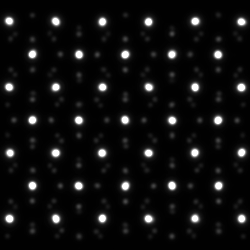

In [ ]:
path = './atomagined/general/png/'
name = '010438.000101-raw.png'
fullname = f'{path}/{name}'
load_img(fullname)

In [ ]:
import csv

with open('./atomagined/key.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))

print(len(data))

67872


In [ ]:
import pandas as pd

In [ ]:
df_data = pd.DataFrame(data)

In [ ]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,id,icsd_id,ref_id,chemical_name_systematic,chemical_formula_structural,chemical_name_structure_type,symmetry_space_group_name,symmetry_Int_Tables_number,uvw_orient,hkl_orient,filename,publication_title,citation
1,0,000004,000004.010201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 2, 1)","(0.0, 76.2767, 53.0857)","ICSD_000004-hkl_(0.0, 76.2767, 53.0857)-uvw_(1...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
2,6,000004,000004.011200,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -2, 0)","(101.702, -127.12, 0.0)","ICSD_000004-hkl_(101.702, -127.12, 0.0)-uvw_(1...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
3,7,000004,000004.021201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(2, -2, 1)","(152.553, -152.55, 53.0857)","ICSD_000004-hkl_(152.553, -152.55, 53.0857)-uv...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
4,9,000004,000004.010102,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 1, 2)","(25.4255, 25.4255, 106.171)","ICSD_000004-hkl_(25.4255, 25.4255, 106.171)-uv...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."


In [ ]:
df_data.columns = df_data.iloc[0]
df_data=df_data.drop(df_data.index[[0]])
df_data.head()

,id,icsd_id,ref_id,chemical_name_systematic,chemical_formula_structural,chemical_name_structure_type,symmetry_space_group_name,symmetry_Int_Tables_number,uvw_orient,hkl_orient,filename,publication_title,citation
1,0,000004,000004.010201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 2, 1)","(0.0, 76.2767, 53.0857)","ICSD_000004-hkl_(0.0, 76.2767, 53.0857)-uvw_(1...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
2,6,000004,000004.011200,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -2, 0)","(101.702, -127.12, 0.0)","ICSD_000004-hkl_(101.702, -127.12, 0.0)-uvw_(1...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
3,7,000004,000004.021201,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(2, -2, 1)","(152.553, -152.55, 53.0857)","ICSD_000004-hkl_(152.553, -152.55, 53.0857)-uv...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
4,9,000004,000004.010102,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, 1, 2)","(25.4255, 25.4255, 106.171)","ICSD_000004-hkl_(25.4255, 25.4255, 106.171)-uv...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."
5,11,000004,000004.011100,'Cerium fluoride','Ce F3',LaF3(P3-c1),'P-3c1',165,"(1, -1, 0)","(76.2767, -76.276, 0.0)","ICSD_000004-hkl_(76.2767, -76.276, 0.0)-uvw_(1...",,"'Acta Crystallographica B (24,1968-38,1982)' 1..."


In [ ]:
col_names = df_data.columns
col_names

Index(['id', 'icsd_id', 'ref_id', 'chemical_name_systematic',
       'chemical_formula_structural', 'chemical_name_structure_type',
       'symmetry_space_group_name', 'symmetry_Int_Tables_number', 'uvw_orient',
       'hkl_orient', 'filename', 'publication_title', 'citation'],
      dtype='object', name=0)

In [ ]:
df_data['symmetry_space_group_name'].unique

<bound method Series.unique of 1          'P-3c1'
2          'P-3c1'
3          'P-3c1'
4          'P-3c1'
5          'P-3c1'
           ...    
67867    'P63/mmc'
67868    'P63/mmc'
67869       'Pa-3'
67870       'Pa-3'
67871       'Pa-3'
Name: symmetry_space_group_name, Length: 67871, dtype: object>

In [ ]:
### get csv data that corresponds to files in general folder only
### 1. get unique list of first 13 chars of filenames in general folder
### 2. get data from ref_id that corresponds to those filenames

### 1. get unique list of first 13 chars of filenames in general folder


In [ ]:
files_list[0][0:13]

'052227.010202'

In [ ]:
gen_ref_ids = []

for file_name in files_list:
  gen_ref_ids.append(file_name[0:13])

In [ ]:
len(gen_ref_ids)

123

In [ ]:
unique_gen_ref_ids = [*set(gen_ref_ids)]
len(unique_gen_ref_ids)

41

### 2. get data from ref_id that corresponds to those filenames

In [ ]:
ref_symm_dict = {}

for ref_id, symm_info in zip(df_data['ref_id'], df_data['symmetry_space_group_name']):
  if (ref_id in unique_gen_ref_ids):
    print(ref_id, symm_info)
    ref_symm_dict[ref_id] = symm_info


010438.000102 'Fm-3m'
010438.010102 'Fm-3m'
010438.010101 'Fm-3m'
010438.010202 'Fm-3m'
010438.000101 'Fm-3m'
020790.010102 'Pnma'
020790.000001 'Pnma'
020790.000201 'Pnma'
020790.020100 'Pnma'
020790.010002 'Pnma'
020790.010201 'Pnma'
020790.020001 'Pnma'
020790.020201 'Pnma'
020790.010100 'Pnma'
020790.000102 'Pnma'
052227.000001 'Pm-3m'
052227.010102 'Pm-3m'
052227.010202 'Pm-3m'
052227.000101 'Pm-3m'
052227.000102 'Pm-3m'
052227.010101 'Pm-3m'
391225.010101 'Pbca'
391225.000100 'Pbca'
391225.010000 'Pbca'
391225.010001 'Pbca'
391225.010102 'Pbca'
391225.000001 'Pbca'
391225.020101 'Pbca'
391225.020001 'Pbca'
391225.010100 'Pbca'
411361.010002 'Pnnm'
411361.010102 'Pnnm'
411361.010000 'Pnnm'
411361.020101 'Pnnm'
411361.010100 'Pnnm'
411361.020102 'Pnnm'
411361.000102 'Pnnm'
411361.000100 'Pnnm'
411361.010201 'Pnnm'
411361.000201 'Pnnm'
411361.000001 'Pnnm'


In [ ]:
ref_symm_dict

{'010438.000102': "'Fm-3m'",
 '010438.010102': "'Fm-3m'",
 '010438.010101': "'Fm-3m'",
 '010438.010202': "'Fm-3m'",
 '010438.000101': "'Fm-3m'",
 '020790.010102': "'Pnma'",
 '020790.000001': "'Pnma'",
 '020790.000201': "'Pnma'",
 '020790.020100': "'Pnma'",
 '020790.010002': "'Pnma'",
 '020790.010201': "'Pnma'",
 '020790.020001': "'Pnma'",
 '020790.020201': "'Pnma'",
 '020790.010100': "'Pnma'",
 '020790.000102': "'Pnma'",
 '052227.000001': "'Pm-3m'",
 '052227.010102': "'Pm-3m'",
 '052227.010202': "'Pm-3m'",
 '052227.000101': "'Pm-3m'",
 '052227.000102': "'Pm-3m'",
 '052227.010101': "'Pm-3m'",
 '391225.010101': "'Pbca'",
 '391225.000100': "'Pbca'",
 '391225.010000': "'Pbca'",
 '391225.010001': "'Pbca'",
 '391225.010102': "'Pbca'",
 '391225.000001': "'Pbca'",
 '391225.020101': "'Pbca'",
 '391225.020001': "'Pbca'",
 '391225.010100': "'Pbca'",
 '411361.010002': "'Pnnm'",
 '411361.010102': "'Pnnm'",
 '411361.010000': "'Pnnm'",
 '411361.020101': "'Pnnm'",
 '411361.010100': "'Pnnm'",
 '411361.

## i think it's necessary to put the data into folders that correspond to the classification
## 1. create dict = [ref_id: label], from symm data for each image in the general folder (done above)
## 2. make folder for each label (inside classified_general folder)
## 3. place image into folder if its label matches the folder name

1. make folders

In [ ]:
class_path = './atomagined/classified_general'


In [ ]:
print(os.path.join(class_path, eval(ref_symm_dict[ref_ids])))

./atomagined/classified_general/Fm-3m


In [ ]:
for ref_ids in unique_gen_ref_ids:
    path = os.path.join(class_path, eval(ref_symm_dict[ref_ids]))
    if not (os.path.exists(path)):
      os.mkdir(path)

<built-in method keys of dict object at 0x7f468ca9b940>


2. copy image that has first 13 characters of its filename matching ref_id into the appropriate classification folder

In [ ]:
import shutil

In [ ]:
# for deleting files the first few times i copied them into the wrong place haha
import os, shutil
folder = './atomagined/classified_general/'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [ ]:
source_path = './atomagined/general/png'
dest_path = './atomagined/classified_general/'

## get each file name
for file_name in files_list:

## get folder name that corresponds to that file name
  source = os.path.join(source_path, file_name)
  destination = dest_path+eval(ref_symm_dict[file_name[0:13]])+'/'+file_name
  #print(source, destination)

  shutil.copyfile(source, destination)

## use those to make source and dest paths

#shutil.copyfile(src, dst)

In [ ]:
img = load_img(fullname, target_size=(299, 299))


In [ ]:
x = np.array(img)
x.shape

(299, 299, 3)

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))


91884032/91884032 [==============================] - 1s 0us/step


In [ ]:
X = np.array([x])

In [ ]:
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)


In [ ]:
pred = model.predict(X)


1/1 [==============================] - 1s 580ms/step


In [ ]:
decode_predictions(pred)


[[('n04591157', 'Windsor_tie', 0.09601347),
  ('n04332243', 'strainer', 0.066944614),
  ('n04264628', 'space_bar', 0.057935376),
  ('n03347037', 'fire_screen', 0.048910603),
  ('n03196217', 'digital_clock', 0.045351215)]]

In [ ]:
## Transfer learning

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './atomagined/classified_general/train',
    target_size=(150, 150),
    batch_size=32
)

Found 103 images belonging to 5 classes.


In [ ]:
train_ds.class_indices


{'Fm-3m': 0, 'Pbca': 1, 'Pm-3m': 2, 'Pnma': 3, 'Pnnm': 4}

In [ ]:
X, y = next(train_ds)


In [ ]:
y[:5]


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
!rmdir './atomagined/classified_general/val/.ipynb_checkpoints'

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './atomagined/classified_general/val',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

val_ds.class_indices

Found 10 images belonging to 5 classes.


{'Fm-3m': 0, 'Pbca': 1, 'Pm-3m': 2, 'Pnma': 3, 'Pnnm': 4}

In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(5)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
4/4 [==============================] - 14s 3s/step - loss: 1.6594 - accuracy: 0.3301 - val_loss: 1.6306 - val_accuracy: 0.4000
Epoch 2/10
4/4 [==============================] - 11s 2s/step - loss: 0.8037 - accuracy: 0.7282 - val_loss: 0.3736 - val_accuracy: 0.9000
Epoch 3/10
4/4 [==============================] - 10s 3s/step - loss: 0.5583 - accuracy: 0.7767 - val_loss: 0.2533 - val_accuracy: 0.9000
Epoch 4/10
4/4 [==============================] - 11s 4s/step - loss: 0.3762 - accuracy: 0.8738 - val_loss: 0.3626 - val_accuracy: 0.8000
Epoch 5/10
4/4 [==============================] - 9s 2s/step - loss: 0.2791 - accuracy: 0.9126 - val_loss: 0.3291 - val_accuracy: 0.9000
Epoch 6/10
4/4 [==============================] - 10s 2s/step - loss: 0.2210 - accuracy: 0.9320 - val_loss: 0.3835 - val_accuracy: 0.8000
Epoch 7/10
4/4 [==============================] - 10s 2s/step - loss: 0.1766 - accuracy: 0.9320 - val_loss: 0.4106 - val_accuracy: 0.9000
Epoch 8/10
4/4 [===================

i can't believe it worked!!

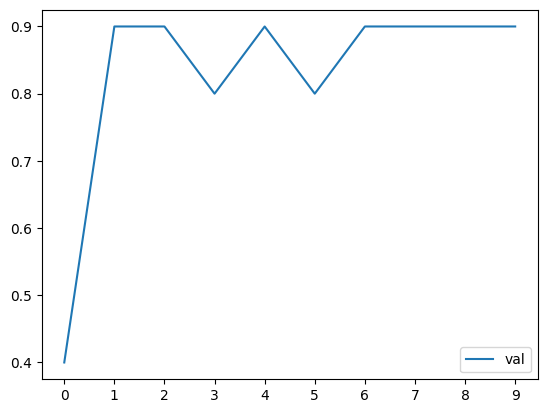

In [ ]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(5)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
4/4 [==============================] - 14s 3s/step - loss: 1.8172 - accuracy: 0.0583 - val_loss: 1.7727 - val_accuracy: 0.1000
Epoch 2/10
4/4 [==============================] - 10s 2s/step - loss: 1.7881 - accuracy: 0.0971 - val_loss: 1.7531 - val_accuracy: 0.1000
Epoch 3/10
4/4 [==============================] - 10s 2s/step - loss: 1.7560 - accuracy: 0.1165 - val_loss: 1.7384 - val_accuracy: 0.1000
Epoch 4/10
4/4 [==============================] - 10s 3s/step - loss: 1.7235 - accuracy: 0.1165 - val_loss: 1.7239 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 9s 3s/step - loss: 1.6951 - accuracy: 0.1262 - val_loss: 1.7100 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 10s 2s/step - loss: 1.6717 - accuracy: 0.1359 - val_loss: 1.6966 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 11s 3s/step - loss: 1.6411 - accuracy: 0.1650 - val_loss: 1.6855 - val_accuracy: 0.0000e+00
Epoch 8/10
4

In [ ]:
del scores[0.1]
del scores[0.0001]

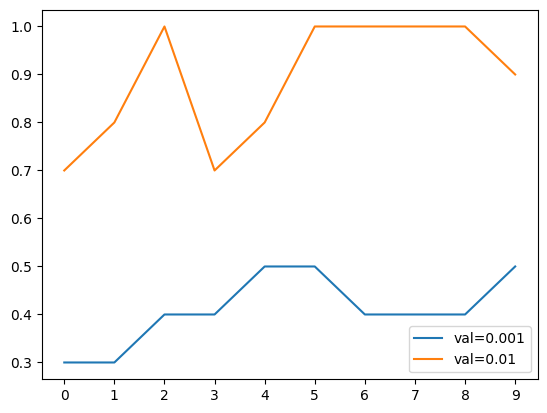

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.01


In [ ]:
model.save_weights('model_v1.h5', save_format='h5')


In [ ]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
4/4 [==============================] - 16s 3s/step - loss: 1.6899 - accuracy: 0.2816 - val_loss: 0.9324 - val_accuracy: 0.6000
Epoch 2/10
4/4 [==============================] - 11s 2s/step - loss: 0.7940 - accuracy: 0.6699 - val_loss: 0.4846 - val_accuracy: 0.8000
Epoch 3/10
4/4 [==============================] - 11s 3s/step - loss: 0.5184 - accuracy: 0.8155 - val_loss: 0.3431 - val_accuracy: 0.9000
Epoch 4/10
4/4 [==============================] - 11s 3s/step - loss: 0.3502 - accuracy: 0.8738 - val_loss: 0.1631 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 15s 4s/step - loss: 0.2584 - accuracy: 0.9029 - val_loss: 0.1287 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 9s 3s/step - loss: 0.2077 - accuracy: 0.9126 - val_loss: 0.1149 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 15s 3s/step - loss: 0.1692 - accuracy: 0.9612 - val_loss: 0.1346 - val_accuracy: 1.0000
Epoch 8/10
4/4 [===================

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(5)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.01

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
4/4 [==============================] - 16s 4s/step - loss: 1.7120 - accuracy: 0.2621 - val_loss: 1.6141 - val_accuracy: 0.3000
Epoch 2/10
4/4 [==============================] - 9s 2s/step - loss: 1.3250 - accuracy: 0.4660 - val_loss: 1.5590 - val_accuracy: 0.4000
Epoch 3/10
4/4 [==============================] - 10s 2s/step - loss: 1.1010 - accuracy: 0.5631 - val_loss: 1.5986 - val_accuracy: 0.3000
Epoch 4/10
4/4 [==============================] - 11s 3s/step - loss: 0.8573 - accuracy: 0.6893 - val_loss: 1.4016 - val_accuracy: 0.4000
Epoch 5/10
4/4 [==============================] - 10s 2s/step - loss: 0.7353 - accuracy: 0.7476 - val_loss: 1.1911 - val_accuracy: 0.4000
Epoch 6/10
4/4 [==============================] - 9s 3s/step - loss: 0.5425 - accuracy: 0.8252 - val_loss: 0.9848 - val_accuracy: 0.6000
Epoch 7/10
3/4 [=====================>........] - ETA: 2s - loss: 0.4560 - accuracy: 0.8542